# Stackelberg Model of Duopoly

Imports and set magics:

In [1]:

import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from Stackelberg import StackelbergDuopoly
from Stackelberg import plot_optimal_quantities

# Model description



 We use the book "A Primer in Game Theory" by Gibbons as our source on the Stackelberg model. The model can be solved analytically as shown below using  `Sympy`


 The model is a game theoretical model that deals with a type of duopoly where one firm moves first (leader) and then a second firm (follower) observes this move and makes its own move. The firms are competing in quantities like in Cournot. 


 Define the profit function for firm i as 
 
 $\pi_i(q_i, q_j)=q_i[P(Q)-c]$

 where $P(Q) = d-Q$ is the market clearing price and Q is the total quantity demanded, that is $Q = q_1 + q_2$

 The game is solved by backwards induction. The method to solve it can be described as below:

 1. Solve firm 2's reaction to any quantity produced by firm 1 - that is, profit maximize for firm 2, taking the quantity produced by firm 1 as a given.
 2. Insert solutution from step 1. into profit function for firm 1. 
 3. Maximize profits for firm 1. (which yields the solution for firm 1)
 4. Take solution from step 3. and insert into the results from step 1 (this yields the solution for firm 2)

## Analytical solution



 The profit functions are shown below for firm 1 and 2, respectively.  

In [2]:
d = sm.symbols('d') 
c = sm.symbols('c') 
q1 = sm.symbols('q_1') 
q2 = sm.symbols('q_2')
Q = q1 + q2
profit1 = q1*(d-Q-c)
profit1


q_1*(-c + d - q_1 - q_2)

In [3]:
profit2 = q2*(d-Q-c)
profit2


q_2*(-c + d - q_1 - q_2)

Taking the FOC for for firm 2 yields 

In [4]:
foc = sm.diff(profit2, q2)
foc

-c + d - q_1 - 2*q_2

Setting this equal to zero and solving for $q_2$ yields

In [5]:
sol1 = sm.solve(sm.Eq(foc,0), q2)
sol1[0].together() #.together() collects the resultsting fractions into one for a nicer view


(-c + d - q_1)/2

The above is the best response function of firm 2 and any quantity from firm 1. This can now be inserted into firm 1's profit function.

$ \pi_1(q_1, R_2(q_1))=q_1[d-q_1-R_2(q_1)-c] =  q_1\frac{d-q_1-c}{2}$

And $R_2(q_1)$ is the reaction function of firm 2


In [6]:
profit1_subs = profit1.subs(q2, sol1[0])
profit1_subs.together()



q_1*(-c + d - q_1)/2

Taking the FOC of this yields 

In [7]:
foc2 = sm.diff(profit1_subs, q1)
foc2.together()

(-c + d - 2*q_1)/2

In [8]:
sol3 = sm.solve(sm.Eq(foc2,0), q1)
sol3[0].together()

(-c + d)/2

And the best reaction function of firm 2 becomes 

In [9]:
bestresponse2_subs = sol1[0].together().subs(q1, sol3[0])
bestresponse2_subs.together()

(-c + d)/4

## Numerical solution

We can solve the model numerically, the code can be found in the Stackelberg.py file. The standard settings are that $d=20$ and $c=2$. The result from the is shown below. 

In [10]:
# Create a Stackelberg duopoly model with parameters c=2, d=20
model = StackelbergDuopoly(d=20, c=2)

# Calculate the optimal quantities
qf_opt, ql_opt = model.get_optimal_quantities()


# Print the results
print(f'Optimal quantity for follower: {qf_opt:.8f}')
print(f'Optimal quantity for leader: {ql_opt:.8f}' )

Optimal quantity for follower: 4.50000000
Optimal quantity for leader: 8.99993750


# Further analysis

In this section we make a 2d plot that shows how the quantities change by marginal costs. Not very surprisingly, the quantities decrease linearly as marginal costs increase. 

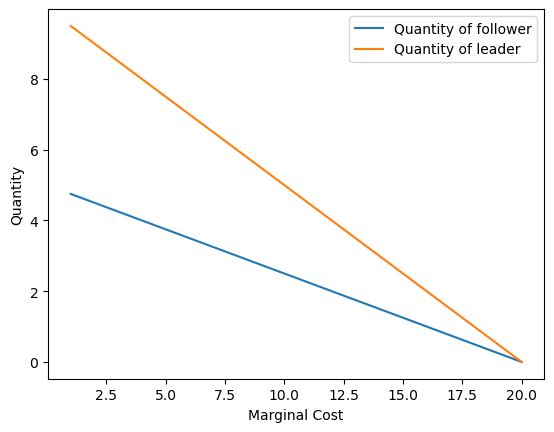

In [12]:
#call plotting function, this can take some time - be patient. (note to self, maybe work on speeding this up?)
plot_optimal_quantities(d=20)

# Conclusion

Add concise conclusion. 